In [381]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["figure.figsize"] = (15,7)

In [382]:
IPL_ball_by_ball_DF = pd.read_csv('/Users/apple/Downloads/IPL Ball-by-Ball 2008-2020.csv')


In [383]:
IPL_Matches_DF = pd.read_csv('/Users/apple/Downloads/IPL Matches 2008-2020.csv')

In [384]:

IPL_Matches_DF.replace('Rising Pune Supergiants','Rising Pune Supergiant',inplace = True)

In [385]:
IPL_Matches_DF = IPL_Matches_DF.drop(['method','result_margin'],axis = 'columns')

In [386]:
IPL_Matches_DF = IPL_Matches_DF.dropna()

In [387]:
IPL_Matches_DF.isna().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

In [388]:
IPL_Matches_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 815
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               799 non-null    int64 
 1   city             799 non-null    object
 2   date             799 non-null    object
 3   player_of_match  799 non-null    object
 4   venue            799 non-null    object
 5   neutral_venue    799 non-null    int64 
 6   team1            799 non-null    object
 7   team2            799 non-null    object
 8   toss_winner      799 non-null    object
 9   toss_decision    799 non-null    object
 10  winner           799 non-null    object
 11  result           799 non-null    object
 12  eliminator       799 non-null    object
 13  umpire1          799 non-null    object
 14  umpire2          799 non-null    object
dtypes: int64(2), object(13)
memory usage: 99.9+ KB


In [389]:
# Total Number of Matches Played
IPL_Matches_DF.id.count()

799

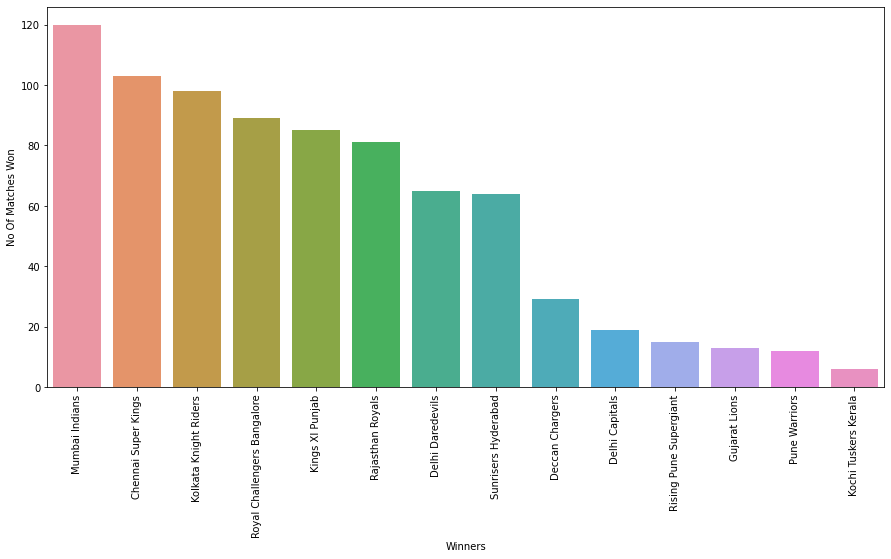

In [446]:
#Most Matches Won 
Count_winner = IPL_Matches_DF.winner.value_counts()
chart = sns.barplot(x=Count_winner.index, y=Count_winner)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xlabel("Winners")
plt.ylabel("No Of Matches Won")
plt.show()

In [391]:
IPL_Matches_DF.date.value_counts()


2016-05-01    2
2019-04-20    2
2017-04-30    2
2011-05-14    2
2011-05-15    2
             ..
2013-04-26    1
2013-04-25    1
2013-04-24    1
2013-05-16    1
2020-11-10    1
Name: date, Length: 584, dtype: int64

In [392]:
IPL_Matches_DF['played_year'] = IPL_Matches_DF.date.apply(lambda x:x.split('-')[0])

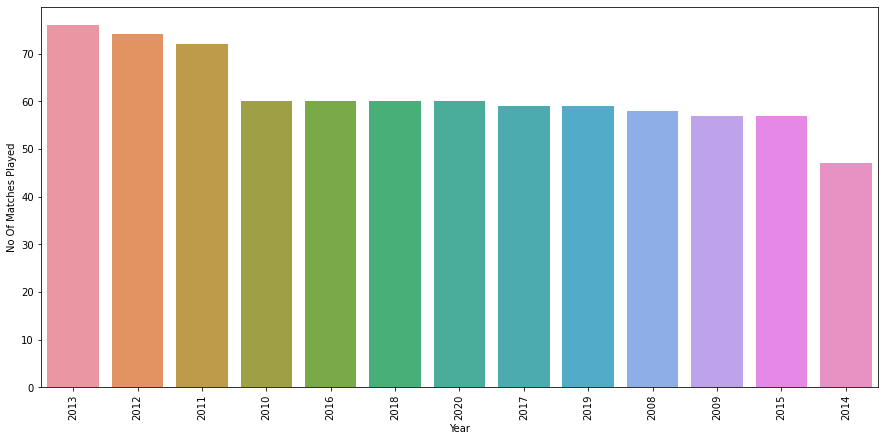

In [447]:
#Number of Matches Playes according to the season
played_year_count = IPL_Matches_DF.played_year.value_counts()
chart = sns.barplot(x=played_year_count.index, y=played_year_count)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xlabel("Year")
plt.ylabel("No Of Matches Played")
plt.show()

In [394]:
matches_played=pd.concat([IPL_Matches_DF['team1'],IPL_Matches_DF['team2']])

In [395]:
Total_Matches_Played = matches_played.value_counts()

In [396]:
Total_Matches_Played = pd.DataFrame(Total_Matches_Played)

In [448]:
#Total Number of Matches played By Each Team
Total_Matches_Played.columns = ['Number of Matches Played']
Total_Matches_Played

,Number of Matches Played
Mumbai Indians,199
Kolkata Knight Riders,190
Royal Challengers Bangalore,188
Kings XI Punjab,187
Chennai Super Kings,175
Rajasthan Royals,157
Delhi Daredevils,155
Sunrisers Hyderabad,120
Deccan Chargers,75
Pune Warriors,45


In [398]:
matches_played_win=IPL_Matches_DF['winner'].value_counts()

In [399]:
matches_played_win = pd.DataFrame(matches_played_win)

In [400]:
matches_played_win.index

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Sunrisers Hyderabad', 'Deccan Chargers',
       'Delhi Capitals', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Pune Warriors', 'Kochi Tuskers Kerala'],
      dtype='object')

In [401]:
matches_played_win.columns = ['No Of Matches Won'] 

In [402]:
FinalMatchesWon =  Total_Matches_Played.join(matches_played_win)

In [449]:
#Matches Played Vs Matches Won by each team
FinalMatchesWon

,Number of Matches Played,No Of Matches Won
Mumbai Indians,199,120
Kolkata Knight Riders,190,98
Royal Challengers Bangalore,188,89
Kings XI Punjab,187,85
Chennai Super Kings,175,103
Rajasthan Royals,157,81
Delhi Daredevils,155,65
Sunrisers Hyderabad,120,64
Deccan Chargers,75,29
Pune Warriors,45,12


In [404]:
win_percentage = round(FinalMatchesWon['No Of Matches Won']/FinalMatchesWon['Number of Matches Played'],3)*100

In [405]:
#winning Percentage
win_percentage

Mumbai Indians                 60.3
Kolkata Knight Riders          51.6
Royal Challengers Bangalore    47.3
Kings XI Punjab                45.5
Chennai Super Kings            58.9
Rajasthan Royals               51.6
Delhi Daredevils               41.9
Sunrisers Hyderabad            53.3
Deccan Chargers                38.7
Pune Warriors                  26.7
Delhi Capitals                 57.6
Gujarat Lions                  43.3
Rising Pune Supergiant         50.0
Kochi Tuskers Kerala           42.9
dtype: float64

<AxesSubplot:ylabel='toss_decision'>

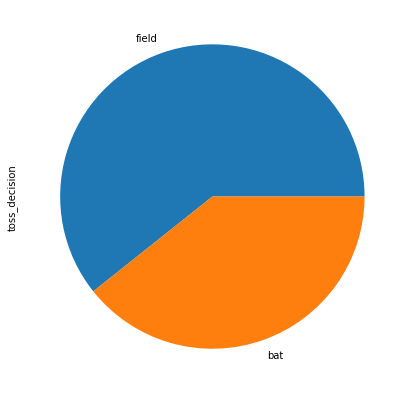

In [406]:
#Likely Desecion After Winning Toss
IPL_Matches_DF.toss_decision.value_counts().plot(kind='pie')

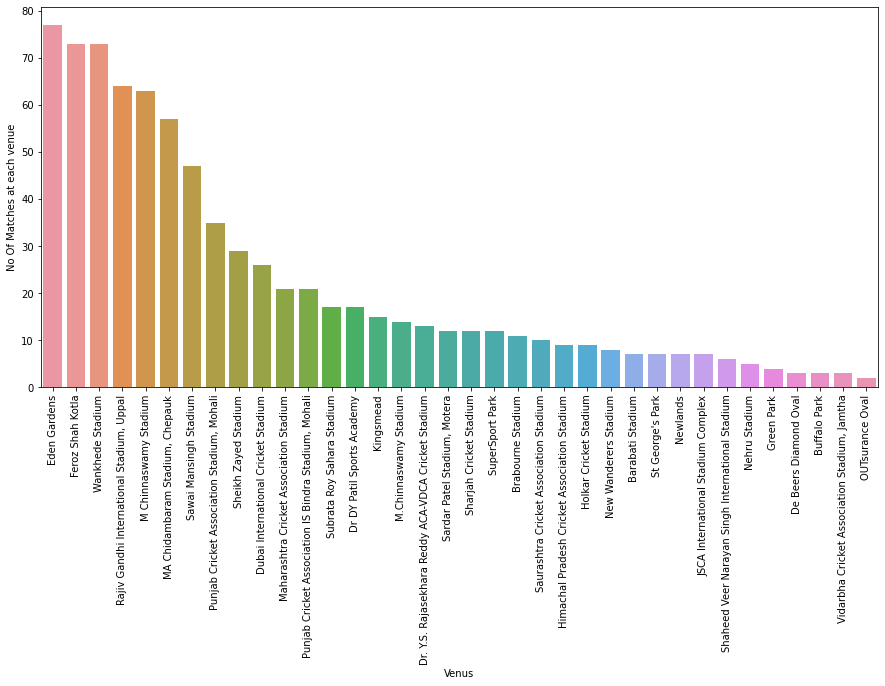

In [450]:
#Most Matches Played at venue
Venu_count = IPL_Matches_DF.venue.value_counts()
chart = sns.barplot(x=Venu_count.index, y=Venu_count)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xlabel("Venus")
plt.ylabel("No Of Matches at each venue")
plt.show()

In [408]:
IPL_ball_by_ball_DF

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [409]:
IPL_Matches_DF

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,eliminator,umpire1,umpire2,played_year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,N,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,N,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,N,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,N,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,N,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,Y,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,N,CB Gaffaney,Nitin Menon,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,N,PR Reiffel,S Ravi,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,N,PR Reiffel,S Ravi,2020


In [410]:
FinalDF = IPL_Matches_DF[['id','played_year']].merge(IPL_ball_by_ball_DF, left_on = 'id', right_on = 'id', how = 'left').drop('id', axis = 1)

In [411]:
FinalDF

,played_year,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189952,2020,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
189953,2020,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
189954,2020,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
189955,2020,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [412]:
Number_of_6s = FinalDF.groupby("played_year")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()

In [453]:
#Number Of Sixes Per Season
Number_of_6s.columns = ['Season','Number Of Sixs']
Number_of_6s

,Season,Number Of Sixs
0,2008,623
1,2009,506
2,2010,585
3,2011,637
4,2012,733
5,2013,675
6,2014,580
7,2015,678
8,2016,639
9,2017,705


In [414]:
Number_of_4s = FinalDF.groupby("played_year")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()

In [455]:
#Number Of Fours Per Season
Number_of_4s.columns = ['Season','Number Of Fours']
Number_of_4s

,Season,Number Of Fours
0,2008,1703
1,2009,1317
2,2010,1708
3,2011,1913
4,2012,1911
5,2013,2052
6,2014,1264
7,2015,1568
8,2016,1633
9,2017,1611


In [416]:
Total_runs = FinalDF.groupby("played_year")["batsman_runs"].sum().reset_index()

In [457]:
# Total RUNS MADE PER SEASON 
Total_runs.columns = ['Season','Total Runs']
Total_runs

,Season,Total Runs
0,2008,16809
1,2009,15344
2,2010,17735
3,2011,19877
4,2012,21323
5,2013,21427
6,2014,14252
7,2015,17042
8,2016,17962
9,2017,17907


In [462]:
MostRUns = pd.pivot_table(FinalDF, index = ['batsman','played_year'],values = 'batsman_runs', aggfunc = 'sum').sort_values('batsman_runs', ascending = False)[:15]

In [464]:
# Most RUNS MADE BY BATSMAN IN IPL according to the season
MostRUns.columns = ['Most Runs Scored']
MostRUns

Most Runs Scored
batsman        played_year                  
V Kohli        2016                      973
DA Warner      2016                      848
KS Williamson  2018                      735
MEK Hussey     2013                      733
CH Gayle       2012                      733
               2013                      708
DA Warner      2019                      692
AB de Villiers 2016                      687
RR Pant        2018                      684
KL Rahul       2020                      670
               2018                      659
DA Warner      2017                      641
V Kohli        2013                      634
SR Tendulkar   2010                      618
S Dhawan       2020                      618

In [474]:
Total_wickets_by = pd.pivot_table(FinalDF, index = ['bowler','played_year'],values='is_wicket', aggfunc = 'sum').sort_values('is_wicket', ascending = False)[:15]

In [475]:
Total_wickets_by

,,is_wicket
bowler,played_year,
DJ Bravo,2013,34
JP Faulkner,2013,33
SL Malinga,2011,30
K Rabada,2020,30
M Morkel,2012,30
SP Narine,2012,29
K Rabada,2019,28
DJ Bravo,2015,28
AJ Tye,2018,28


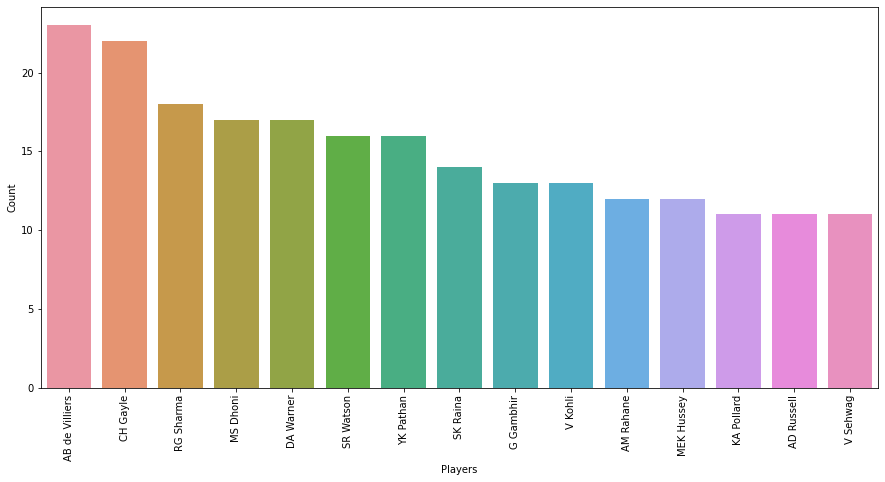

In [425]:
#Most Valueable Player
Value_player = IPL_Matches_DF.player_of_match.value_counts()[:15]
chart = sns.barplot(x=Value_player.index, y=Value_player)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.xlabel("Players")
plt.ylabel("Count")
plt.show()

In [426]:
Total_Number_of_4s = FinalDF.groupby("batsman")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index().sort_values('batsman_runs', ascending = False)[:15]

In [428]:
#Total Number Of Fours Hit by 
Total_Number_of_4s.columns = ['Batsman','Number Of Fours']
Total_Number_of_4s

,Batsman,Number Of Fours
407,S Dhawan,584
116,DA Warner,504
505,V Kohli,496
438,SK Raina,492
154,G Gambhir,492
379,RG Sharma,455
398,RV Uthappa,448
42,AM Rahane,412
96,CH Gayle,381
24,AB de Villiers,373


In [316]:
Total_Number_of_6s = FinalDF.groupby("batsman")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index().sort_values('batsman_runs', ascending = False)[:15]

In [429]:
#Total Number Of Sixes Hit by 
Total_Number_of_6s.columns = ['Batsman','Number Of Sixes']
Total_Number_of_6s

,Batsman,Number Of Sixes
96,CH Gayle,346
24,AB de Villiers,233
301,MS Dhoni,215
379,RG Sharma,212
505,V Kohli,196
438,SK Raina,193
220,KA Pollard,190
116,DA Warner,186
456,SR Watson,186
398,RV Uthappa,161


In [431]:
Total_RUNS_PER_SEASON = pd.pivot_table(FinalDF, index = ['played_year'],values = 'total_runs',aggfunc = 'sum').sort_values('total_runs', ascending = False)

In [433]:
Total_RUNS_PER_SEASON.columns = ['Total RUNS MADE PER SEASON']

In [469]:
#Total RUNS MADE PER SEASON
Total_RUNS_PER_SEASON

,Total RUNS MADE PER SEASON
played_year,
2013,22541
2012,22453
2011,21098
2018,19901
2020,19352
2019,19297
2010,18864
2016,18862
2017,18769


In [435]:
Team_RUNS_PER_SEASON = pd.pivot_table(FinalDF, index = ['batting_team','played_year'],values = 'total_runs', aggfunc = 'sum').sort_values('total_runs', ascending = False)

In [470]:
Team_RUNS_PER_SEASON.columns = ['Runs']

In [471]:
#Most Runs Scored by the Team according to the season
Team_RUNS_PER_SEASON

Runs
batting_team                played_year      
Royal Challengers Bangalore 2016         2981
Mumbai Indians              2013         2975
Chennai Super Kings         2012         2831
                            2018         2809
Mumbai Indians              2017         2789
...                                       ...
Rajasthan Royals            2009         1688
                            2011         1687
Royal Challengers Bangalore 2014         1559
Sunrisers Hyderabad         2014         1480
Delhi Daredevils            2014         1463

[108 rows x 1 columns]

In [482]:
Team_wickets_PER_SEASON = pd.pivot_table(FinalDF, index = ['played_year'],values = 'is_wicket', aggfunc = 'sum').sort_values('is_wicket', ascending = False)

In [483]:
Team_wickets_PER_SEASON.columns = ['WICKETS']

In [484]:
#Total Number Of Wickets Taken by 
Team_wickets_PER_SEASON

,WICKETS
played_year,
2013,910
2012,858
2011,810
2010,722
2018,722
2017,709
2009,697
2008,690
2015,675
